In [1]:
import torch
import torchvision.models as tvm
import sys
sys.path.append("../src/")
from banal import sample_level_k_variance
from transformers import ViTForImageClassification

from img.img_utils import \
    MyMaskedImageClassifier, BinarizedMaskedImageClassifier, SmoothingWrapper, \
    load_images_from_directory, load_image_from_path

import matplotlib.pyplot as plt
device = "cuda"

/home/antonxue/lib/miniconda3/envs/tfl/lib/python3.10/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/antonxue/lib/miniconda3/envs/tfl/lib/python3.10/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/antonxue/lib/miniconda3/envs/tfl/lib/python3.10/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


In [2]:
images = load_images_from_directory("/home/antonxue/foo/imagenet-sample-images")
images.shape

torch.Size([1000, 3, 224, 224])

In [3]:
# model = MyMaskedImageClassifier(tvm.resnet18(weights=tvm.ResNet18_Weights.IMAGENET1K_V1), grid_size=(7,7))
model = MyMaskedImageClassifier(
    ViTForImageClassification.from_pretrained("google/vit-base-patch16-224"), grid_size=(7,7)
)
bin_model = BinarizedMaskedImageClassifier(model, images[0])
bin_model.eval().to(device)

mbin_model = SmoothingWrapper(bin_model, lambda_=0.9)
mbin_model.eval().to(device);

In [4]:
n = 49

In [5]:
out_k = sample_level_k_variance(bin_model, n, 10, input_samples=1024)

In [11]:
out_k = sample_level_k_variance(bin_model, n, n, input_samples=1024)

In [10]:
out_k["sampled_coefficients"].sum(dim=0)

tensor([-0.0763, -1.0015, -0.3475, -0.6930, -0.5751, -1.2224, -0.8950, -0.5935,
        -0.2623, -0.8285, -0.1327, -1.3137, -0.2565, -0.8816, -0.5572, -0.8786,
        -0.8809, -0.9949, -1.0856, -0.5352, -0.3463, -0.0579, -0.7048, -0.6460,
        -0.3224, -1.0080, -0.8135, -0.7793, -0.5415, -0.2723, -0.3014, -0.5871,
        -0.3229,  0.5033,  0.1645, -0.3451, -0.6079, -0.4398,  0.2392, -0.2535,
        -0.6244, -0.1818, -0.1444, -0.2082, -0.4909, -0.6325, -0.5553, -0.3242,
        -0.5189, -0.6761, -0.2530, -0.4278,  0.5333,  0.1667,  0.1654, -0.1931,
         0.8291, -0.3559,  0.4229, -0.2892,  0.4927,  0.5166, -0.0604,  0.0286,
         0.0501,  0.5141,  0.0188,  0.1566,  0.1722, -0.2616, -0.7170, -0.6387,
        -0.1403, -0.3212, -0.6009,  0.0704,  0.5211,  0.0916, -0.8525,  0.0691,
        -1.1529, -0.5424, -0.4640, -0.8078, -0.8290, -1.2843, -0.4375,  0.2266,
        -0.4355,  0.2379, -0.3669, -0.4239, -0.5224, -0.8594, -0.5356, -0.1421,
        -0.4221, -1.3767, -1.3044, -0.90

In [6]:
out_k["sampled_coefficients"].abs().max(dim=0)

torch.return_types.max(
values=tensor([1.3884, 0.7633, 0.0495, 0.1277, 0.0892, 0.2478, 0.0859, 0.0525, 0.0377,
        0.0875, 0.0478, 0.0814, 0.1096, 0.1719, 0.0955, 0.2249, 0.1911, 0.1116,
        0.1670, 0.0925, 0.1663, 0.1308, 0.0879, 0.0901, 0.0875, 0.0684, 0.2076,
        0.0765, 0.1051, 0.3451, 0.0634, 0.1518, 0.0711, 0.1253, 0.0921, 0.1159,
        0.1207, 0.0715, 0.1734, 0.1184, 0.2323, 0.1376, 0.0774, 0.0664, 0.0676,
        0.0559, 0.1714, 0.0835, 0.0534, 0.0683, 0.0723, 0.0490, 0.0632, 0.0592,
        0.0491, 0.1580, 0.0604, 0.1202, 0.0539, 0.1292, 0.0626, 0.0527, 0.0520,
        0.0518, 0.0816, 0.0841, 0.1063, 0.0737, 0.0743, 0.0585, 0.1041, 0.1406,
        0.1229, 0.0577, 0.1033, 0.0424, 0.0751, 0.1001, 0.0594, 0.1242, 0.1213,
        0.1271, 0.0758, 0.0759, 0.0836, 0.1177, 0.0562, 0.0639, 0.0690, 0.0864,
        0.1183, 0.0601, 0.1505, 0.0865, 0.0989, 0.0731, 0.1037, 0.0720, 0.0659,
        0.1178, 0.0658, 0.0642, 0.0549, 0.2066, 0.0971, 0.0649, 0.0550, 0.0959,
        0

In [7]:
out_k["sampled_coefficients"].sum(dim=0).abs().sort(descending=True).values

tensor([3.2125, 2.7049, 2.4805, 2.4504, 2.4267, 2.3807, 2.3248, 2.2622, 2.1626,
        2.0643, 1.8955, 1.8533, 1.8099, 1.7930, 1.7842, 1.7554, 1.7103, 1.7012,
        1.6509, 1.6495, 1.6451, 1.6169, 1.5909, 1.5680, 1.5666, 1.5529, 1.5503,
        1.5386, 1.5205, 1.5177, 1.5127, 1.4673, 1.4637, 1.4554, 1.4472, 1.4359,
        1.4320, 1.4214, 1.3996, 1.3870, 1.3767, 1.3761, 1.3756, 1.3564, 1.3520,
        1.3292, 1.3137, 1.3125, 1.3044, 1.2848, 1.2843, 1.2832, 1.2827, 1.2730,
        1.2647, 1.2490, 1.2440, 1.2341, 1.2327, 1.2316, 1.2224, 1.2200, 1.2189,
        1.2151, 1.2014, 1.1910, 1.1884, 1.1870, 1.1846, 1.1842, 1.1821, 1.1723,
        1.1710, 1.1586, 1.1567, 1.1529, 1.1381, 1.1352, 1.1347, 1.1218, 1.1170,
        1.1155, 1.1094, 1.0995, 1.0965, 1.0933, 1.0914, 1.0907, 1.0903, 1.0856,
        1.0792, 1.0765, 1.0696, 1.0611, 1.0610, 1.0508, 1.0481, 1.0458, 1.0455,
        1.0443, 1.0437, 1.0268, 1.0251, 1.0224, 1.0151, 1.0122, 1.0120, 1.0118,
        1.0111, 1.0101, 1.0080, 1.0021, 

In [ ]:
mout_k = sample_level_k_variance(mbin_model, n, 10, input_samples=)

In [6]:
out_k["sampled_coefficients"].shape

torch.Size([1024, 1000])

tensor([1.0169e+01, 6.7807e+00, 6.4002e+00, 5.9595e+00, 5.9286e+00, 5.8619e+00,
        5.1343e+00, 5.0928e+00, 4.9862e+00, 4.9637e+00, 4.9483e+00, 4.8771e+00,
        4.7424e+00, 4.6646e+00, 4.5909e+00, 4.5244e+00, 4.5212e+00, 4.3591e+00,
        4.2437e+00, 4.1515e+00, 4.1225e+00, 4.0867e+00, 3.9858e+00, 3.8529e+00,
        3.8144e+00, 3.8118e+00, 3.8102e+00, 3.7683e+00, 3.7607e+00, 3.7098e+00,
        3.6397e+00, 3.6313e+00, 3.5835e+00, 3.5523e+00, 3.5456e+00, 3.5275e+00,
        3.4596e+00, 3.4552e+00, 3.4454e+00, 3.4413e+00, 3.4234e+00, 3.4090e+00,
        3.3803e+00, 3.3320e+00, 3.3122e+00, 3.2599e+00, 3.2565e+00, 3.1869e+00,
        3.1858e+00, 3.1842e+00, 3.1840e+00, 3.1603e+00, 3.1432e+00, 3.1404e+00,
        3.1313e+00, 3.1301e+00, 3.1065e+00, 3.1005e+00, 3.0932e+00, 3.0900e+00,
        3.0891e+00, 3.0617e+00, 3.0535e+00, 3.0530e+00, 3.0525e+00, 3.0468e+00,
        3.0405e+00, 3.0296e+00, 3.0042e+00, 2.9873e+00, 2.9842e+00, 2.9767e+00,
        2.9650e+00, 2.9524e+00, 2.9465e+

torch.return_types.max(
values=tensor([2.5423, 1.4282, 0.1172, 0.2803, 0.1729, 0.5493, 0.1610, 0.1074, 0.0780,
        0.1805, 0.1157, 0.2152, 0.2130, 0.3274, 0.2098, 0.4479, 0.4020, 0.2213,
        0.3458, 0.2022, 0.3473, 0.2335, 0.1729, 0.2022, 0.1948, 0.1213, 0.4057,
        0.1530, 0.1971, 0.6575, 0.1748, 0.2940, 0.1207, 0.2178, 0.1343, 0.1885,
        0.2423, 0.1433, 0.3560, 0.2000, 0.4526, 0.2257, 0.1821, 0.1179, 0.1418,
        0.1133, 0.3022, 0.1648, 0.0858, 0.1849, 0.1488, 0.1190, 0.1054, 0.1232,
        0.1041, 0.3298, 0.1079, 0.2068, 0.1152, 0.2777, 0.1174, 0.0780, 0.1044,
        0.1064, 0.1723, 0.1380, 0.1965, 0.1788, 0.1541, 0.1118, 0.2171, 0.2715,
        0.2323, 0.1196, 0.2068, 0.1061, 0.1511, 0.2212, 0.1410, 0.1883, 0.2253,
        0.2828, 0.1581, 0.1602, 0.1798, 0.2523, 0.1162, 0.1147, 0.1378, 0.1740,
        0.2514, 0.1282, 0.3436, 0.1935, 0.2237, 0.1562, 0.1933, 0.1515, 0.1101,
        0.2490, 0.1267, 0.1203, 0.1294, 0.4618, 0.2110, 0.1440, 0.0949, 0.2338,
        0

In [5]:
# for k in tqdm(range(0, 196+1)):
all_vars = []
all_mvars = []
for k in range(0, n+1):
    var_k = sample_level_k_variance(bin_model, n, k, input_samples=256)
    mvar_k = sample_level_k_variance(mbin_model, n, k, input_samples=256)
    all_vars.append(var_k.cpu()), all_mvars.append(mvar_k.cpu())
    print(k, all_vars[-1].mean(), all_mvars[-1].mean())
all_vars = torch.stack(all_vars)
all_mvars = torch.stack(all_mvars)

0 tensor(0.7790) tensor(0.7805)
1 tensor(0.7687) tensor(0.7948)
2 tensor(0.7993) tensor(0.7915)
3 tensor(0.7761) tensor(0.7888)
4 tensor(0.7852) tensor(0.7882)
5 tensor(0.7726) tensor(0.7828)
6 tensor(0.7808) tensor(0.7852)
7 tensor(0.7878) tensor(0.7804)
8 tensor(0.8057) tensor(0.7813)
9 tensor(0.7808) tensor(0.7857)
10 tensor(0.7804) tensor(0.7919)
11 tensor(0.7929) tensor(0.7827)
12 tensor(0.7954) tensor(0.7898)
13 tensor(0.7822) tensor(0.7888)
14 tensor(0.7860) tensor(0.7863)
15 tensor(0.7941) tensor(0.7790)
16 tensor(0.7843) tensor(0.7883)
17 tensor(0.7816) tensor(0.7876)
18 tensor(0.7783) tensor(0.7794)
19 tensor(0.7823) tensor(0.7800)
20 tensor(0.7893) tensor(0.7862)
21 tensor(0.7707) tensor(0.7734)
22 tensor(0.7943) tensor(0.7787)
23 tensor(0.7891) tensor(0.7874)
24 tensor(0.7719) tensor(0.7872)
25 tensor(0.7752) tensor(0.7832)
26 tensor(0.7857) tensor(0.7851)
27 tensor(0.7855) tensor(0.7768)
28 tensor(0.7853) tensor(0.7867)
29 tensor(0.7880) tensor(0.7819)
30 tensor(0.7928) te

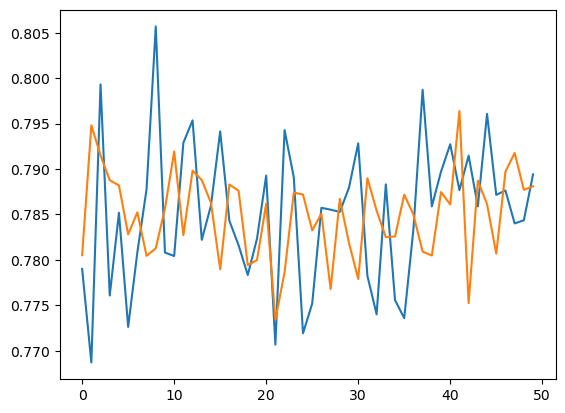

In [6]:
plt.clf()
plt.plot(all_vars.mean(dim=(1,2)).numpy())
plt.plot(all_mvars.mean(dim=(1,2)).numpy())

In [7]:
plt.clf()
plt.imshow(bin_model.image.numpy().transpose(1,2,0))

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

<Figure size 640x480 with 0 Axes>